## Decision Tree Baseline Model

In [11]:
import pandas as pd
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

crashes_cleaned = pd.read_csv('../data/crashes_cleaned.csv', index_col = 0)
crashes_cleaned.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,BAD DRIVING,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,BAD DRIVING,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,BAD DRIVING,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,BAD DRIVING,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,BREAKING LAW,2,15,...,0,0,0,0,1,0,0,1,0,0


### Primary Contributory Causes 

In [12]:
crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)

BAD DRIVING                   0.622616
BREAKING LAW                  0.257843
OUTSIDE FACTORS               0.063773
DRINKING/DRUGS                0.033166
DISTRACTION INSIDE VEHICLE    0.016300
OTHER                         0.006302
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

### Label Encoding Target Variable

In [13]:
# label encoding target variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'] = label.fit_transform(crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'])
crashes_cleaned

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,0,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,0,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,0,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,0,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,1,2,15,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,ffffc0eaf9bc22a04bf318b62e0e1c5ec59a4f3c0c3493...,30,1,0,0,1,0,0,2,12,...,1,0,0,0,0,0,0,1,0,0
798901,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,30,0,0,0,0,2,3,2,7,...,1,0,0,0,0,0,0,0,0,1
798902,ffffd143cf6dc784876069140869d2d724080089450108...,30,1,0,0,1,2,0,2,19,...,0,0,0,0,1,0,0,1,0,0
798904,ffffe577251dc1cc67f2f823b595e5028427a210e2a40e...,30,1,0,0,1,1,1,2,8,...,1,0,0,0,0,0,0,1,0,0


### Perform Train Test Split 

In [14]:
# create X and y and train test split
from sklearn.model_selection import train_test_split

X = crashes_cleaned.drop(columns = ['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_RECORD_ID'])
y = crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [15]:
X_train[0:5].shape

(5, 125)

### Distribution of Target Variable Across Classes

In [16]:
y_train.value_counts(normalize = True)

0    0.622782
1    0.257874
5    0.063843
3    0.033149
2    0.016104
4    0.006249
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

In [7]:
# # import tree and instantiate and fit baseline model
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()

# clf.fit(X_train, y_train)

### Perform Cross Validation on Train Set

In [8]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

def cross_validation(X_train, y_train, num_split=10):
    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits=num_split).split(X_train):
        # Train and validation splitting
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        # Create/fit decision tree classifier
        clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state =10)
        clf.fit(X_train_fold, y_train_fold)

        # Evaluate performance
        accuracy_train = clf.score(X_train_fold, y_train_fold)
        accuracy_val = clf.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

result = cross_validation(X_train, y_train, num_split=10)
print(result)

{'train': 0.7460422537608794, 'validation': 0.7357580725245328}


### Plot Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
plot_tree(clf,
           max_depth = 3,
           feature_names = crashes_cleaned.columns, 
           class_names=np.unique(y).astype('str'),
           filled = True,
           ax = axes)
plt.show()

### Baseline Model Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

y_pred_proba = clf.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
# auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
# print('AUC Score:', auc_score)

### Criterion='Entropy'

In [ ]:
# build a model and change purity metric to entropy 

clf_entropy = DecisionTreeClassifier(criterion='entropy')

clf_entropy.fit(X_train, y_train)

y_preds_entropy = clf_entropy.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_preds_entropy))

### Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
# scale the data lets see if it improves the score
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# try out both models on scaled data
clf.fit(X_train_sc, y_train)
y_preds_sc_gini = clf.predict(X_test_sc)
print('Accuracy gini scaled:', accuracy_score(y_test, y_preds_sc_gini))

clf_entropy.fit(X_train_sc, y_train)
y_preds_sc_entropy = clf_entropy.predict(X_test_sc)
print('Accuracy entropy scaled:', accuracy_score(y_test, y_preds_sc_entropy))

Scaling the data made miniscule difference i will not be using the scaled data.

### Balance Weights

In [ ]:
# balance the class weights
clf_w = DecisionTreeClassifier(class_weight='balanced')
clf_w.fit(X_train, y_train)
y_preds_w = clf_w.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_w))

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score:', auc_score)

### Oversampling: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
# model with resampled training data using SMOTE
clf_resamp = DecisionTreeClassifier()

clf_resamp.fit(X_train_resampled, y_train_resampled)

y_preds_resamp = clf_resamp.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_resamp))

y_pred_proba_resamp = clf_resamp.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba_resamp,  multi_class='ovo')
print('AUC Score:', auc_score)

## Tuning Hyperparameters

### Max_depth

In [ ]:
# ok this is bad lets do something else 
# find best depth
depth_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

for depth in depth_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = depth, min_samples_split = 10)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy depth', depth,':', accuracy_score(y_test, y_preds))
    
    y_pred_proba = clf.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
    print('AUC Score', depth, ':', auc_score)

### min_samples_split

In [ ]:
# find best min samples split
minsamp_list = [15, 17, 19, 21, 23, 25, 27, 35]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score', minsamp, ':', auc_score)

In [ ]:
# iteration for best minimum samples split
minsamp_list = [37, 39, 41, 43, 45, 50]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Test Score:', auc_score)

### min_samples_leaf

In [ ]:
# iteration for best minimum samples leaf 
minsamp_list = [37, 39, 41, 43, 45, 50, 100]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = minsamp, min_samples_split = 50)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')

### Combination of Best Hyperparameters

In [ ]:
# best model 
clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)
clf_hyper.fit(X_train, y_train)
y_preds = clf_hyper.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

### Final Model Scores:

In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

print('Accuracy:', accuracy_score(y_test, y_preds))
print('Precision:', precision_score(y_test, y_preds, average=None))
print('Recall:', recall_score(y_test, y_preds, average=None))
print('f1 score:', f1_score(y_test, y_preds, average=None))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_preds))
print('Precision:', precision_score(y_test, y_preds, average='weighted'))
print('Recall:', recall_score(y_test, y_preds, average='weighted'))
print('f1 score:', f1_score(y_test, y_preds, average='weighted'))

### Resampled and Final Model Hyperparameters Scores:

In [ ]:
clf_resamp = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)

clf_resamp.fit(X_train_resampled, y_train_resampled)

y_preds_resamp = clf_resamp.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_preds_resamp))
print('Precision:', precision_score(y_test, y_preds_resamp, average='weighted'))
print('Recall:', recall_score(y_test, y_preds_resamp, average='weighted'))
print('f1 score:', f1_score(y_test, y_preds_resamp, average='weighted'))

In [ ]:
print(classification_report(y_test, y_preds_resamp))

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1 score:', f1_score(y_test, y_pred, average=None))

In [ ]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state= 15),
                            n_estimators=20, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

In [ ]:
bag_list = [20, 30, 40, 50]

for bag in bag_list:
    bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state= 15),
                            n_estimators=bag, max_samples=0.5, max_features=0.5)
    bagging.fit(X_train, y_train)
    bagging.score(X_test,y_test)

    y_pred = bagging.predict(X_test)

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

In [ ]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(X_train_resampled, y_train_resampled)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1 score:', f1_score(y_test, y_pred, average=None))

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_list = [20, 30, 40, 50]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

In [ ]:
forest_list = [60,70,80]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

In [ ]:
forest_list = [90, 100, 110, 120]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

### Best number of estimators model

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf_final = RandomForestClassifier(n_estimators=120, max_depth=None,  min_samples_split=2, random_state=0)
clf_final.fit(X_train, y_train)
clf_final.score(X_test,y_test)
y_pred = clf_final.predict(X_test)

print('-----------------------------------------')
print('n_estimators')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

-----------------------------------------
n_estimators
Accuracy: 0.7416870738047696
Precision: [0.7623517  0.68872138 0.44827586 0.60266667 0.84126984 0.66438579]
Precision weighted: 0.7270818320540627
Recall: [0.8940893  0.64902075 0.01169065 0.05128205 0.12426729 0.24153044]
Recall weighted: 0.7416870738047696
f1 score: [0.82298192 0.66828196 0.02278703 0.09452112 0.2165475  0.35426983]
f1 score weighted: 0.7117932702284568


### Confusion Matrix

In [19]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

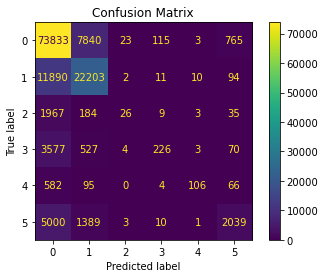

In [27]:
cm_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm_)
cm_display.plot()
plt.title('Confusion Matrix')
# plt.savefig('../images/cm_randomforest.png', facecolor='w', transparent=False)
plt.show()

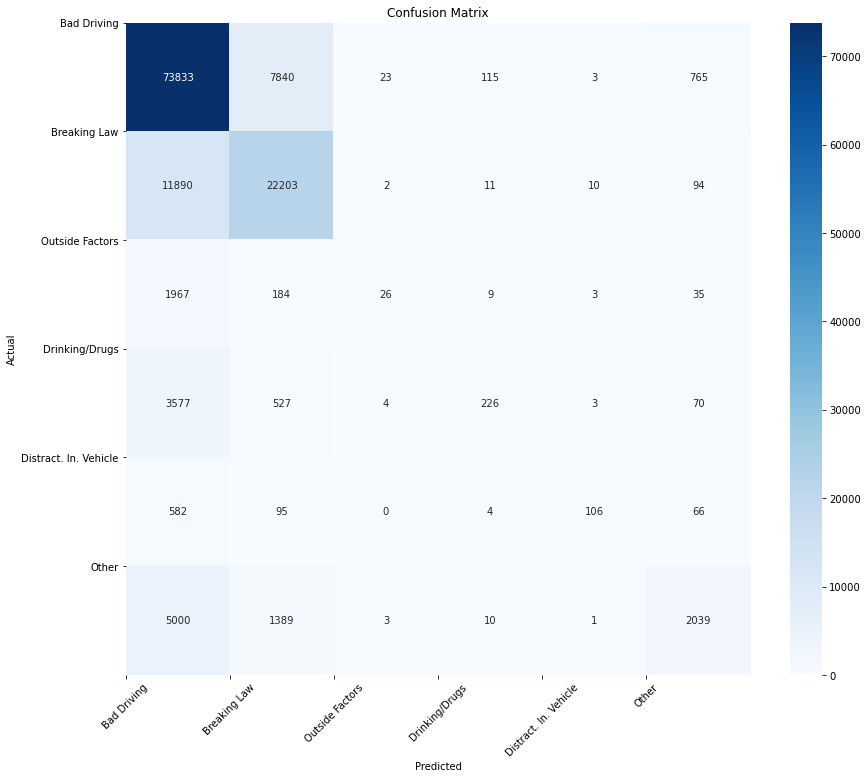

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class_names = ['Bad Driving', 'Breaking Law', 'Outside Factors', 'Drinking/Drugs', 'Distract. In. Vehicle', 'Other']

cm_ = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm_, annot=True, cmap='Blues', fmt='d')

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=0)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../images/cm_randomforest.png', facecolor='w', transparent=False)
plt.show()

- Class 0 (Bad Driving) and Class 1 (Breaking Laws) have most true positive predictions, although they do often get confused with one another. 
- With Class 2 (Ouutside Factors) and Class 4 (Distraction inside vehicle) on the other hand, the classifer only got confused between them once. 

### Roc Curve and AUC

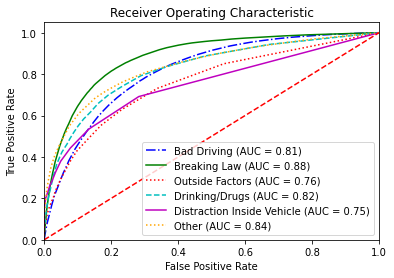

In [46]:
# roc curve and auc score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_scores = clf_final.predict_proba(X_test)
n_classes = len(clf_final.classes_)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=clf_final.classes_)

# Calculate the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class names 
class_names = ['Bad Driving', 'Breaking Law', 'Outside Factors', 'Drinking/Drugs', 'Distraction Inside Vehicle', 'Other']

# Plot the ROC curves
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'orange']  # List of colors for each class
linestyles = ['-.', '-', ':', '--', '-', ':']  # List of line styles for each class

for class_name, i in zip(class_names, range(n_classes)):
    color = colors[i % len(colors)]  # Cycle through the colors for each class
    linestyle = linestyles[i % len(linestyles)]  # Cycle through the line styles for each class
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('../images/roc_randomforest.png', facecolor='w', transparent=False)
plt.show()


- The higher the AUC (Area Under the Curve), the better the model performance. In this case it separates the performance by each class and we see that Class 1 (Breaking Laws) is predicted with the highest accuracy. 

### Evaluation

- The classifier that performed the best was the Random Forest Classifier, with 120 estimators it reached 74% accuracy.

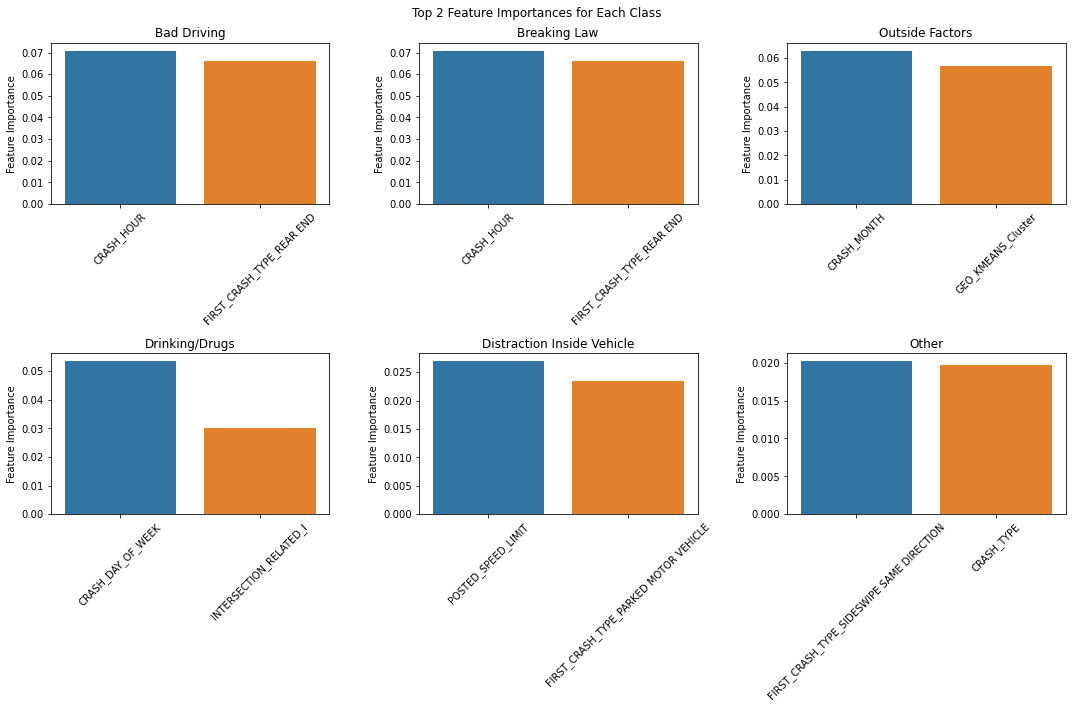

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names
class_names = ['Bad Driving', 'Breaking Law', 'Outside Factors', 'Drinking/Drugs', 'Distraction Inside Vehicle', 'Other']

# Print the feature importances
feature_importances = clf_final.feature_importances_

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a figure with three columns and two rows
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Top 2 Feature Importances for Each Class")

# Iterate over each class
for class_label, ax in zip(range(6), axes.flatten()):
    # Filter the sorted feature importances and names for the current class
    class_sorted_importances = sorted_importances[class_label*2 : (class_label+1)*2]
    class_sorted_feature_names = sorted_feature_names[class_label*2 : (class_label+1)*2]

    if class_label == 0:
        # For class 0, select the 3rd and 4th feature instead
        class_sorted_importances = sorted_importances[class_label*2 + 2 : (class_label+1)*2 + 2]
        class_sorted_feature_names = sorted_feature_names[class_label*2 + 2 : (class_label+1)*2 + 2]

    # Create the bar plot for the current class
    sns.barplot(x=class_sorted_feature_names, y=class_sorted_importances, ax=ax )
    ax.set_title(class_names[class_label])  # Set the title using class_names
#     ax.set_xlabel("Feature Name")
    ax.set_ylabel("Feature Importance")

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('../images/feature_importance.png', facecolor='w', transparent=False)
plt.show()